# 9.3. Simulation

1. Definition: Simulation is the process of using a computer to mimic a physical experiment.
2. Example: tossing a die in 9.2 Iteration

## 9.3.1. The Process

1. Step 1: What to Simulate; e.g., coin tosses
2. Step 2: Simulating One Value (make it work: write/use a function)
3. Step 3: Number of Repetitions (loop)
4. Step 4: Simulating Multiple Values

The flow works like this:
1. Create an **empty array** in which to collect all the simulated values. We will call this the **collection array**.
2. Create a "**repetitions sequence**,” that is, a sequence whose **length** is the number of repetitions you specified in STEP 3. For **n** repetitions we will almost always **use the sequence np.arange(n)**.
3. Create a **for loop**. For each element of the repetitions sequence:
   1. Simulate one value by using the function you wrote in STEP 2.
   2. Augment the collection array with this simulated value.


## 9.3.2. Example: Number of Heads in 100 Tosses

It is natural to expect that in 100 tosses of a coin, there will be 50 heads, **give or take a few**.

#### Step 1: What to Simulate
The quantity we are going to simulate is the number of heads in 100 tosses.

#### Step 2: Simulating One Value
- To randomly choose from heads and tails, use **np.random.choice()** (syntax: `np.random.choice(array)`; 
`np.random.choice(array, n, replace=True))`)
- The syntax of np.random.choice():
  - np.random.choice(array)
  - np.random.choice(array, n, replace=True)
- https://www.data8.org/datascience/reference-nb/datascience-reference.html#np.random.choice

See: https://numpy.org/doc/stable/reference/generated/numpy.dtype.byteorder.html
- '<' little-endian (The lowest-value byte is stored first.)
- 'U' Variable-length Unicode string
- <U5 means the longest one is a string of length 5

In [1]:
from datascience import *
import numpy as np
### random choice
die = make_array(1, 2, 3, 4, 5, 6)
die

array([1, 2, 3, 4, 5, 6])

In [2]:
### np.random.choice replacement

np.random.choice(die)

### now try this case for replacement T/F
# np.random.choice(die, 7)   ### replacement is default to true
# np.random.choice(dir, 7, replace=False)   ### replacement is default to true

3

In [3]:
### instead of 1-6, now try heads and tails

coin = make_array('Heads', 'Tails')     ### create the array 
                                        #################################################    
ten_tosses = np.random.choice(coin, 10) ### numpy would just do the looping for you #####
ten_tosses                              #################################################


array(['Tails', 'Heads', 'Tails', 'Tails', 'Heads', 'Tails', 'Tails',
       'Heads', 'Heads', 'Heads'],
      dtype='<U5')

In [4]:
### a side note: see the differences isn np.array and make_array. They all create numpy.ndarray, though. 
### the output is a bit different

str1 = np.array(['ooooaaaaqqqk','ccccvvvvvaaaao','ggghhhjjjsskkka'])
print(type(str1))   ### ['ooooaaaaqqqk' 'ccccvvvvvaaaao' 'ggghhhjjjsskkka']
str2 = make_array(['ooooaaaaqqqk','ccccvvvvvaaaao','ggghhhjjjsskkka'])
print(type(str2))   ### [['ooooaaaaqqqk' 'ccccvvvvvaaaao' 'ggghhhjjjsskkka']]
str3 = make_array('ooooaaaaqqqk','ccccvvvvvaaaao','ggghhhjjjsskkka')
print(type(str3))   ### ['ooooaaaaqqqk' 'ccccvvvvvaaaao' 'ggghhhjjjsskkka']

### ndarray = n-dimensional array

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [5]:
##### let's count this array (value 'True')

np.count_nonzero(ten_tosses == 'Heads') ### count_zero count array
                                        ### (ten_tosses == 'Headds'), as an expression, is 
                                        ### evaluated to return an array

5

In [6]:
outcomes = np.random.choice(coin, 100)  ### coin is an array containing...
# num_heads = np.count_nonzero(outcomes == "Heads")
num_heads = np.count_nonzero(outcomes == 'Heads')
num_heads

##### from here we make sure np.random.choice(coin, 100) works

45

In [7]:
### test
np.random.choice(coin, 100)
### works

array(['Heads', 'Tails', 'Heads', 'Heads', 'Heads', 'Tails', 'Tails',
       'Heads', 'Heads', 'Tails', 'Tails', 'Tails', 'Tails', 'Tails',
       'Tails', 'Tails', 'Tails', 'Tails', 'Heads', 'Tails', 'Heads',
       'Tails', 'Heads', 'Tails', 'Tails', 'Heads', 'Heads', 'Heads',
       'Heads', 'Heads', 'Heads', 'Tails', 'Heads', 'Tails', 'Tails',
       'Heads', 'Tails', 'Tails', 'Tails', 'Tails', 'Tails', 'Tails',
       'Tails', 'Heads', 'Heads', 'Heads', 'Tails', 'Heads', 'Tails',
       'Heads', 'Heads', 'Tails', 'Tails', 'Tails', 'Heads', 'Heads',
       'Heads', 'Heads', 'Tails', 'Heads', 'Tails', 'Heads', 'Tails',
       'Tails', 'Heads', 'Tails', 'Tails', 'Heads', 'Tails', 'Tails',
       'Tails', 'Heads', 'Heads', 'Tails', 'Tails', 'Heads', 'Tails',
       'Tails', 'Tails', 'Heads', 'Heads', 'Heads', 'Tails', 'Tails',
       'Tails', 'Heads', 'Heads', 'Tails', 'Heads', 'Tails', 'Heads',
       'Tails', 'Tails', 'Tails', 'Tails', 'Tails', 'Heads', 'Heads',
       'Tails', 'Tai

In [54]:
##### define the function to be called for many times

def one_simulated_value():
    outcomes = np.random.choice(coin, 100)          ### TERRIBEL one simulation is heads count of 100 tosses
    return np.count_nonzero(outcomes == 'Heads')    ### only return the number of heads

In [83]:
### run once

head1 = one_simulated_value()
head1

51

#### Step 3: Number of Repetitions

- The more we use, the more reliable our simulations will be, but the longer it will take to run the code. 
- Let us go for 20,000 repetitions. That means we are going to do the following 20,000 times:
  - Toss a coin 100 times and count the number of heads.

#### Step 4: Simulating Multiple Values

In [10]:
num_repetitions = 20000    ### number of repetitions
heads = make_array()       ### empty array

for i in np.arange(num_repetitions):
    new_value = one_simulated_value()
    heads = np.append(heads, new_value)    ### np.append(ARR, VAL)

In [11]:
heads

array([ 48.,  49.,  51., ...,  58.,  49.,  45.])

In [12]:
len(heads)

20000

In [13]:
### create a table of the result (20,000 tosses)

simulation_results = Table().with_columns(
    'Repetiion', np.arange(1, num_repetitions + 1),   ### this is the count
    'Number of Heads', heads                          ### 
)

simulation_results.show(5)

Repetiion,Number of Heads
1,48
2,49
3,51
4,47
5,57


32.0
71.0


39

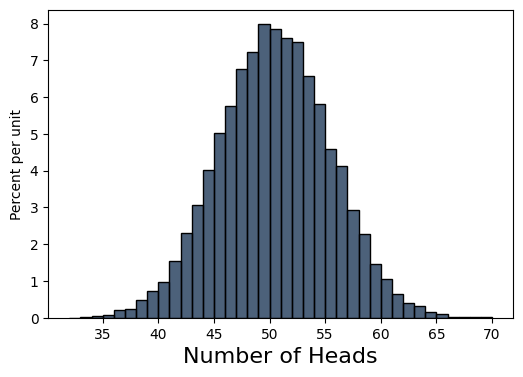

In [42]:
%matplotlib inline
# simulation_results.hist('Number of Heads', bins = np.arange(30.5, 69.6, 1))
##### The 68–95–99.7 rule
##### https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule

min_sim = min(simulation_results['Number of Heads'])
max_sim = max(simulation_results['Number of Heads'])
print(min_sim)
print(max_sim)
##### what does these two numbers tell us?

simulation_results.hist('Number of Heads', bins = np.arange(min_sim , max_sim, 1))  
### hist: 1 variable
### note the bins

31.0
72.0


5

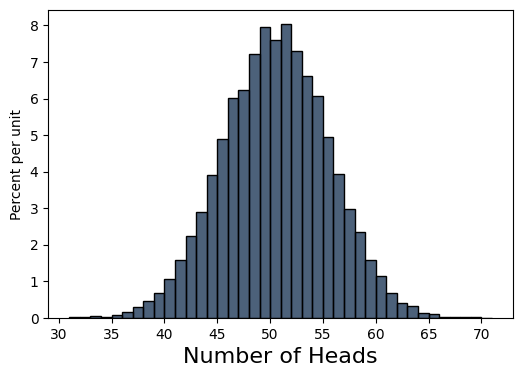

In [118]:
### final question
num_repetitions = 20000    ### number of repetitions
heads = make_array()       ### empty array

for i in np.arange(num_repetitions):
    new_value = one_simulated_value()
    heads = np.append(heads, new_value)    ### np.append(ARR, VAL)

simulation_results = Table().with_columns(
    'Repetiion', np.arange(1, num_repetitions + 1),   ### this is the count
    'Number of Heads', heads                          ### 
)

min_sim = min(simulation_results['Number of Heads'])
max_sim = max(simulation_results['Number of Heads'])
print(min_sim)
print(max_sim)
simulation_results.hist('Number of Heads', bins = np.arange(min_sim , max_sim, 1))  

np.mean(np.arange(min_sim, max_sim))
round(np.std(simulation_results['Number of Heads']))

##### Discussion
- The histogram looks roughly symmetric around 50 heads.
- The height of the bar at 50 is about 8% per unit: meaning 8% of the repetitions are at 50
- Almost all of the repetitions, the number of heads in 100 tosses was somewhere between 35 and 65; with the bulk of the repetitions produced numbers of heads in the range 45 to 55.
- **possible** vs **propbabl**: in theory it is possible that the number of heads can be anywhere between 0 and 100, the simulation shows that the range of probable values is much smaller.

## 9.3.3. Example: Moves in Monopoly

- Each move in the game Monopoly is determined by the total number of spots of two rolls of a die. (??? I thought it's 2 dice?)
- Explore this by simulating the sum of two rolls of a die.
- We will run the simulation 10,000 times.
- Write a function to simulate the total number of spots in one pair of rolls. 

In [15]:
die = np.arange(1, 7)
sum(np.random.choice(die, 2))     ### sum ( randomly choose 2 from 1..6 )

9

In [16]:
##### this is one move in Monopoly

def one_simulated_move():
    return sum(np.random.choice(die, 2))

one_simulated_move()

4

In [17]:
##### create 10000 simulation

num_repetitions = 10000         ### num of repetition
moves = make_array()            ### new data array
                                ### the function that put things together to simulate
for i in np.arange(num_repetitions):
    new_move = one_simulated_move()
    moves = np.append(moves, new_move)

In [18]:
moves

array([  5.,   9.,   6., ...,  11.,   5.,   3.])

In [19]:
len(moves)

10000

In [20]:
### make a histogram

results = Table().with_columns(
    'Repetions', np.arange(1, num_repetitions + 1),   ### +1 because it's zero-based
    'Sum of Two Rolls', moves
)
results.show(3)

Repetions,Sum of Two Rolls
1,5
2,9
3,6


In [21]:
max(results.column('Sum of Two Rolls'))

12.0

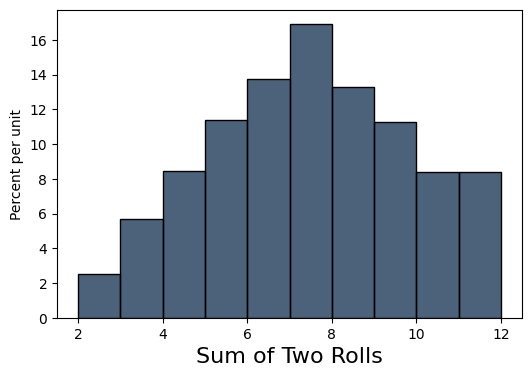

In [22]:
results.hist('Sum of Two Rolls')


Seven is the most common value, with the frequencies falling off symmetrically on either side.

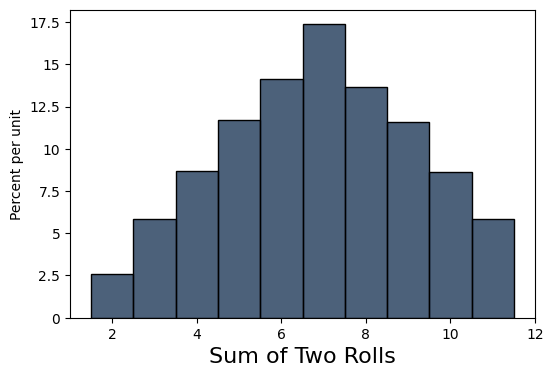

In [23]:
# min_results = min('results')
results.hist('Sum of Two Rolls', bins = np.arange(1.5, 12, 1))

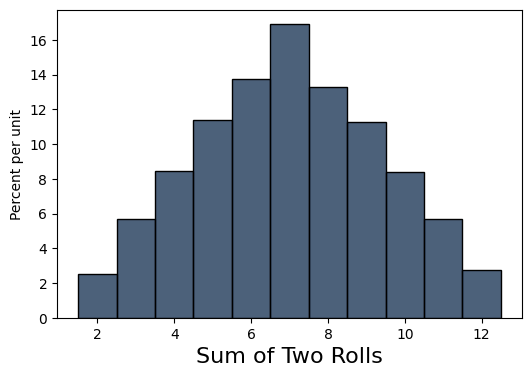

In [24]:
### binning: 12.6 == 12 + half of the interval + a little

results.hist('Sum of Two Rolls', bins = np.arange(1.5, 12.6, 1))